In [13]:
# compare the sextractor catalog from my stacked image
# to the dophot catalog that Brian Stalder ran

In [17]:
import sys # needed to import cat_utils 
#sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')
sys.path.insert(0, '/home/abrahamn/21cmIRxcor/')

In [21]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from '/home/abrahamn/21cmIRxcor/cat_utils.py'>

In [22]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [36]:
raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
dphcat = cat_utils.IRCatalog(dph_path=raw_frames_path+'02a57694o0326I.dph',fits_path=analysis_root+'/02a57694o0326I/02a57694o0326I_5degframecentered.fits')

loading /Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0326I.dph
identifying and excluding artifacts (ie, saturated pixels)
0.0
0.0920471281296
0.184094256259
0.276141384389
0.368188512518
0.460235640648
0.552282768778
0.644329896907
0.736377025037
0.828424153166
0.920471281296


In [25]:
#analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57639/whole_field/'
analysis_root = '/home/abrahamn/xcor_data/analysis/ATLAS_mwa57639/whole_field/'

countscols = [1,3,5,7,9,11]
fluxlabels = ['iso','isocor','auto','petro','best','win']

for i in range(len(countscols)):
    if i == 0:
        secat = cat_utils.IRCatalog(se_path=analysis_root+'whole_field_bgsub.sex',fits_path=analysis_root+'whole_field_bgsub.fits',se_magzpt=20.46,racol=13,deccol=14,countscol=countscols[i])
        g = secat.g
    else:
        secat = cat_utils.IRCatalog(se_path=analysis_root+'whole_field_bgsub.sex',goodsrcs=g,se_magzpt=20.46,racol=13,deccol=14,countscol=countscols[i])
    pickle.dump( secat, open( analysis_root+'whole_field_secat_'+fluxlabels[i]+'.p', "wb" ) )

loading/home/abrahamn/xcor_data/analysis/ATLAS_mwa57639/whole_field/whole_field_bgsub.sex
identifying and excluding artifacts (ie, saturated pixels)
0.0
0.00552938314202
0.011058766284
0.0165881494261
0.0221175325681
0.0276469157101
0.0331762988521
0.0387056819941
0.0442350651361
0.0497644482782
0.0552938314202
0.0608232145622
0.0663525977042
0.0718819808462
0.0774113639882
0.0829407471303
0.0884701302723
0.0939995134143
0.0995288965563
0.105058279698
0.11058766284
0.116117045982
0.121646429124
0.127175812266
0.132705195408
0.13823457855
0.143763961692
0.149293344834
0.154822727976
0.160352111118
0.165881494261
0.171410877403
0.176940260545
0.182469643687
0.187999026829
0.193528409971
0.199057793113
0.204587176255
0.210116559397
0.215645942539
0.221175325681
0.226704708823
0.232234091965
0.237763475107
0.243292858249
0.248822241391
0.254351624533
0.259881007675
0.265410390817
0.270939773959
0.276469157101
0.281998540243
0.287527923385
0.293057306527
0.298586689669
0.304116072811
0.3096

In [10]:
import cPickle as pickle
#pickle.dump( secat, open( analysis_root+'whole_field_secat.p', "wb" ) )
#secat = pickle.load( open( analysis_root+'whole_field_secat.p', "rb" ) )

In [11]:
analysis_root+'whole_field_secat.p'

'/home/abrahamn/xcor_data/analysis/ATLAS_mwa57639/whole_field/whole_field_secat.p'

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(dphcat.ra,dphcat.dec,15000*dphcat.jy,'r',alpha=.5,edgecolor='none')
plt.scatter(secat.ra,secat.dec,15000*secat.jy,alpha=.5,facecolors='none',edgecolors='k',linewidth=2)
plt.xlim([-2,0])
plt.ylim([-26,-24.5])

NameError: name 'dphcat' is not defined

(-20, -40)

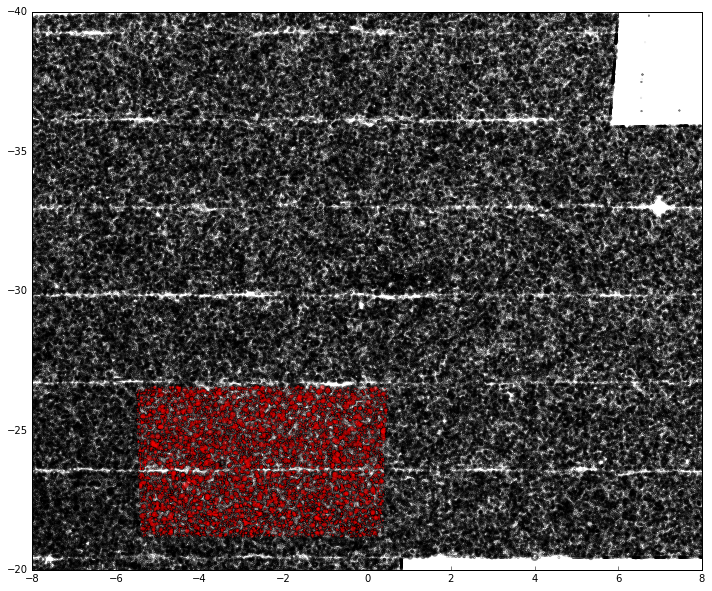

In [43]:
plt.figure(figsize=(12,10))
plt.scatter(secat.ra,secat.dec,150*secat.jy,alpha=.5,facecolors='none',edgecolors='k',linewidth=2)
plt.scatter(dphcat.ra,dphcat.dec,150*dphcat.jy,'r',alpha=.5,edgecolor='none')
plt.xlim([-8,8])
plt.ylim([-20,-40])

(30, 31)
(30, 31)


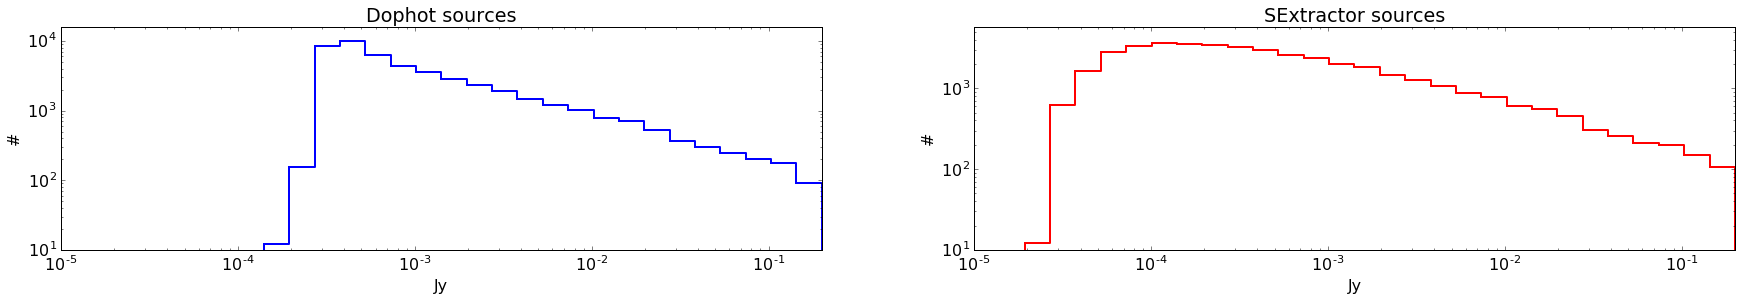

In [77]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(30,4))
plt.subplot(121)
cat_utils.logloghist(plt,dphcat.jy[dphcat.jy<5],.00001,.2,30,'b')
plt.xlim([.00001,.2])#plt.xlim([0,.01])
plt.title('Dophot sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

plt.subplot(122)
cat_utils.logloghist(plt,secat.jy[secat.jy<5],.00001,.2,30,'r')
plt.xlim([.00001,.2])
#plt.xlim([0,10])
plt.title('SExtractor sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

(74866,)